In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from altair import datum
%matplotlib inline

In [4]:
wine = pd.read_csv('WINE.csv', header=None, names = ["country", "alcohol", "deaths", "heart_deaths", "liver_deaths"])
wine['country'] = wine['country'].str.replace('"', '')

FileNotFoundError: [Errno 2] No such file or directory: 'WINE.csv'

In [ ]:
wine

,country,alcohol,deaths,heart_deaths,liver_deaths
0,Australia,2.5,785,211,15.3
1,Austria,3.9,863,167,45.6
2,Belg/Lux,2.9,883,131,20.7
3,Canada,2.4,793,191,16.4
4,Denmark,2.9,971,220,23.9
5,Finland,0.8,970,297,19.0
6,France,9.1,751,71,37.9
7,Iceland,0.8,743,211,11.2
8,Ireland,0.7,1000,300,6.5
9,Israel,0.6,834,183,13.7


#Important Objects in Matplotlib

- figures
- axes

##Creating Figures and Axes

**Method 1 - plt.add_subplot**

<Axes: >

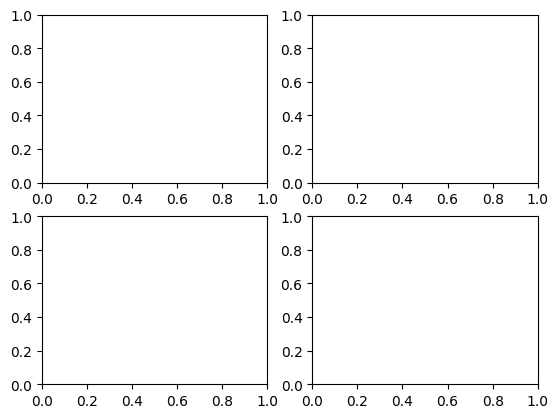

In [ ]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
fig.add_subplot(2, 2, 2)
fig.add_subplot(2, 2, 3)
fig.add_subplot(2, 2, 4)

In [ ]:
print(type(fig))
print(type(fig.axes))

<class 'matplotlib.figure.Figure'>
<class 'list'>


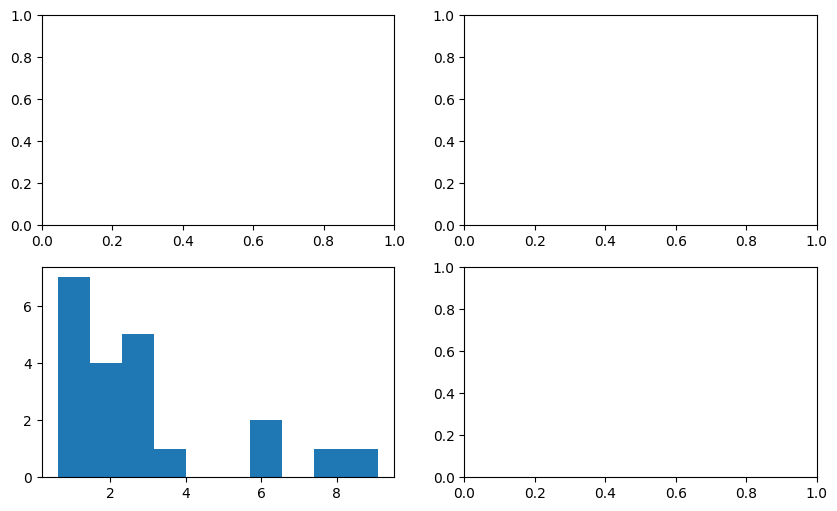

In [ ]:
fig = plt.figure(figsize = (10, 6))
fig.add_subplot(2, 2, 1)
fig.add_subplot(2, 2, 2)
fig.add_subplot(2, 2, 4)
fig.add_subplot(2, 2, 3)
plt.hist(wine.alcohol);

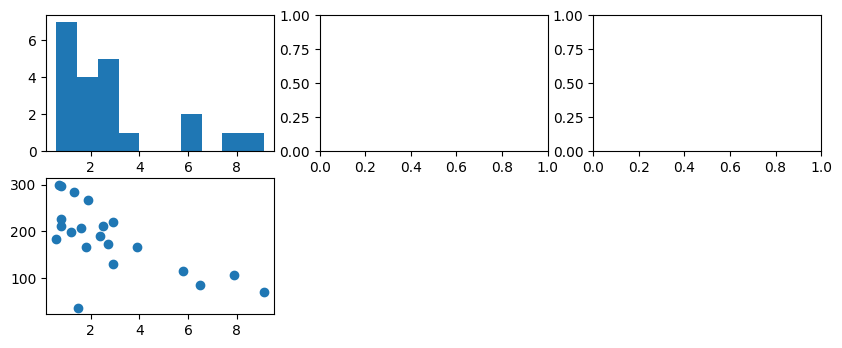

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 4)
ax4 = fig.add_subplot(3, 3, 3)

ax1.hist(wine.alcohol)
ax3.scatter(wine.alcohol, wine.heart_deaths);

**Method 2 - plt.subplots**

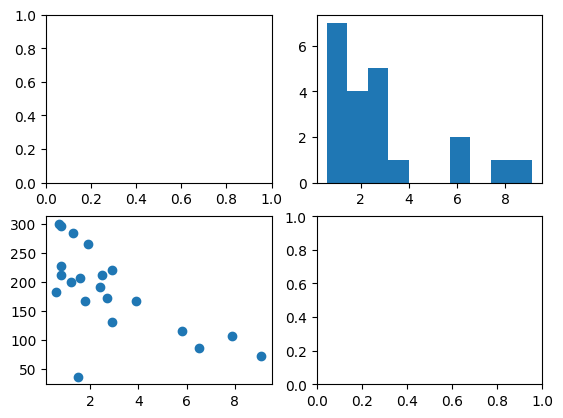

In [ ]:
fig, ax = plt.subplots(2, 2)
ax
#add plots
ax[0][1].hist(wine.alcohol)
ax[1][0].scatter(wine.alcohol, wine.heart_deaths);

##Sharex and Sharey

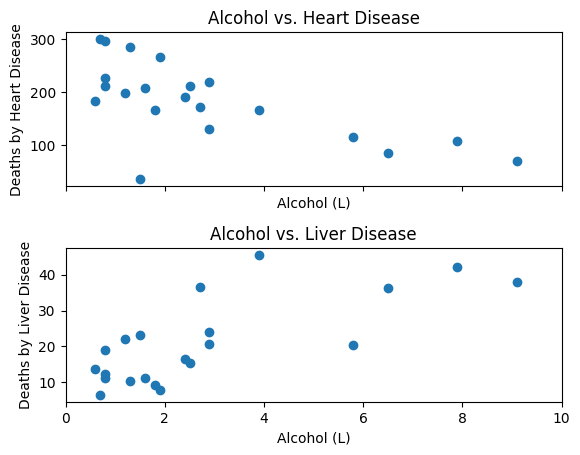

In [ ]:
fig, ax = plt.subplots(2, 1, sharex = True)
ax[0].scatter(wine.alcohol, wine.heart_deaths)
ax[0].set_xlim(0, 10)
ax[0].set_xlabel('Alcohol (L)')
ax[0].set_ylabel('Deaths by Heart Disease')
ax[0].set_title('Alcohol vs. Heart Disease')
ax[1].scatter(wine.alcohol, wine.liver_deaths)
ax[1].set_xlabel('Alcohol (L)')
ax[1].set_ylabel('Deaths by Liver Disease')
ax[1].set_title('Alcohol vs. Liver Disease')
plt.subplots_adjust(hspace=0.4);



#Marks and Channels in Altair

**Marks:** https://altair-viz.github.io/user_guide/marks/index.html

**Channels:** https://altair-viz.github.io/user_guide/encodings/channels.html

In [6]:
from vega_datasets import data

In [7]:
uri = 'https://vega.github.io/vega-datasets/data/penguins.json'
penguins = pd.read_json(uri)
print(uri)

https://vega.github.io/vega-datasets/data/penguins.json


In [8]:
penguins.head()

,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
penguins.shape


(344, 7)

## Position on a Common Scale

In [10]:
alt.Chart(penguins).mark_circle().encode(
    x = 'Beak Length (mm)'
)

alt.Chart(...)

In [12]:
# rendering in front end of browser
# data is queried directly
alt.Chart(uri).mark_circle().encode(
    x = alt.X('Beak Length (mm):Q', title="BeakLength", scale = alt.Scale(zero=False))
)

alt.Chart(...)

## Position on an Unaligned Scale

In [14]:
alt.Chart(penguins).mark_circle().encode(
    x = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    column = 'Island',
    color = 'Island'
)

alt.Chart(...)

## Length

In [15]:
# add index to separate bars
# show two ways of filtering (pandas vs. transform_filter)
alt.Chart(penguins).mark_bar().encode(
    x = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
)

alt.Chart(...)

In [16]:
penguins['i'] = penguins.index
penguins.head()

,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex,i
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,4


In [ ]:
# add index to separate bars
# show two ways of filtering (pandas vs. transform_filter)
alt.Chart(penguins).mark_bar().encode(
    y = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    x = 'i',
    color = 'Species:N'
).transform_filter((datum['i']>= 0) & (datum['i'] < 10))

alt.Chart(...)

## Area

In [19]:
# adjust height and width in properties
alt.Chart(penguins).mark_circle().encode(
    x = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    size = 'Beak Length (mm):Q'
)

alt.Chart(...)

## Color

### Hue

In [21]:
# note we did not specify the species data type
alt.Chart(penguins).mark_circle().encode(
    x = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    size = 'Beak Length (mm):Q',
    color = 'Species'
)

alt.Chart(...)

In [ ]:
# let's see how Vega-Lite reads the species field
print(alt.Chart(penguins).mark_circle().encode(
    x = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    size = 'Beak Length (mm):Q',
    color = 'Species'
).to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.20.1.json",
  "config": {
    "view": {
      "continuousHeight": 300,
      "continuousWidth": 300
    }
  },
  "data": {
    "name": "data-4383bbd005fab146750abff8c44ccd71"
  },
  "datasets": {
    "data-4383bbd005fab146750abff8c44ccd71": [
      {
        "Beak Depth (mm)": 18.7,
        "Beak Length (mm)": 39.1,
        "Body Mass (g)": 3750.0,
        "Flipper Length (mm)": 181.0,
        "Island": "Torgersen",
        "Sex": "MALE",
        "Species": "Adelie",
        "i": 0
      },
      {
        "Beak Depth (mm)": 17.4,
        "Beak Length (mm)": 39.5,
        "Body Mass (g)": 3800.0,
        "Flipper Length (mm)": 186.0,
        "Island": "Torgersen",
        "Sex": "FEMALE",
        "Species": "Adelie",
        "i": 1
      },
      {
        "Beak Depth (mm)": 18.0,
        "Beak Length (mm)": 40.3,
        "Body Mass (g)": 3250.0,
        "Flipper Length (mm)": 195.0,
        "Island": "Torgersen",
        "Sex"

### Saturation

Measures the intensity / purity of a color. How much does a color differ from grey?

In [23]:
alt.Chart(penguins).mark_circle().encode(
    x = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    size = 'Beak Length (mm):Q',
    color = 'Species:O'
)

alt.Chart(...)

### Luminance

Measuring brightness / lightness of a color. Greyscale.

In [30]:
alt.Chart(penguins).mark_circle().encode(
    x = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    size = 'Beak Length (mm):Q',
    color = alt.Color('Species:O', scale = alt.Scale(scheme='greys'))
)

alt.Chart(...)

## Spatial Region

In [31]:
alt.Chart(penguins).mark_circle().encode(
    x = 'Species:N',
    y = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    color = 'Species:N',
).properties(height=200, width=700)

alt.Chart(...)

## Shape

In [32]:
alt.Chart(penguins).mark_point().encode(
    x = 'Species:N',
    y = alt.X('Beak Length (mm):Q', scale = alt.Scale(zero=False)),
    color = 'Species:N',
    shape = 'Species:N'
).properties(height=200, width=700)

alt.Chart(...)